# Anvil on Coiled Demo

In [1]:
import coiled

cluster = coiled.Cluster(
    name="nyc-analysis",
    software="coiled-examples/dask-dataframes",
    n_workers=25,
    worker_memory="16GiB",
    worker_cpu=4,
    scheduler_options={"idle_timeout": "1 hour"},
)

Output()

In [2]:
from distributed import Client

client = Client(cluster)
client

<Client: 'tls://10.4.15.106:8786' processes=25 threads=100, memory=387.24 GiB>

In [3]:
import dask.dataframe as dd

In [4]:
# read in Parquet data for February 2020 (repartitioned to 100MB file)
ddf = dd.read_parquet(
    "s3://coiled-datasets/dask-book/nyc-tlc/2011-2021-raw/",
    storage_options={"anon": True},
    blocksize="16 MiB",
)

In [5]:
# drop rows with wrong dates
ddf = ddf.loc[ddf.tpep_pickup_datetime.dt.year.isin(range(2011, 2022))]

In [6]:
count_per_year = (
    ddf.groupby(ddf.tpep_pickup_datetime.dt.year).trip_distance.count().compute()
)

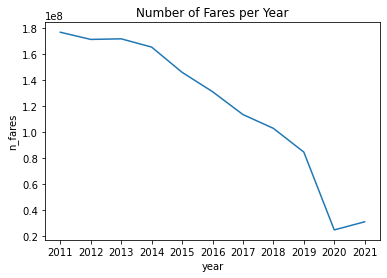

In [7]:
count_per_year.plot(
    xticks=range(2011, 2021 + 1),
    title="Number of Fares per Year",
    xlabel="year",
    ylabel="n_fares",
);

In [8]:
# get mean tip per year
tip_per_year = ddf.groupby(ddf.tpep_pickup_datetime.dt.year).tip_amount.mean().compute()

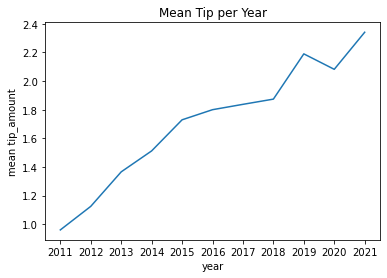

In [9]:
tip_per_year.plot(
    xticks=range(2011, 2021 + 1),
    title="Mean Tip per Year",
    xlabel="year",
    ylabel="mean tip_amount",
);

In [12]:
tip_per_year

tpep_pickup_datetime
2011    0.959665
2012    1.124348
2013    1.365416
2014    1.511834
2015    1.729140
2016    1.799889
2017    1.837298
2018    1.873763
2019    2.190089
2020    2.082037
2021    2.341179
Name: tip_amount, dtype: float64

In [17]:
import pandas as pd
df = pd.DataFrame(data=tip_per_year).reset_index()

In [18]:
df

,tpep_pickup_datetime,tip_amount
0,2011,0.959665
1,2012,1.124348
2,2013,1.365416
3,2014,1.511834
4,2015,1.729140
5,2016,1.799889
6,2017,1.837298
7,2018,1.873763
8,2019,2.190089
9,2020,2.082037


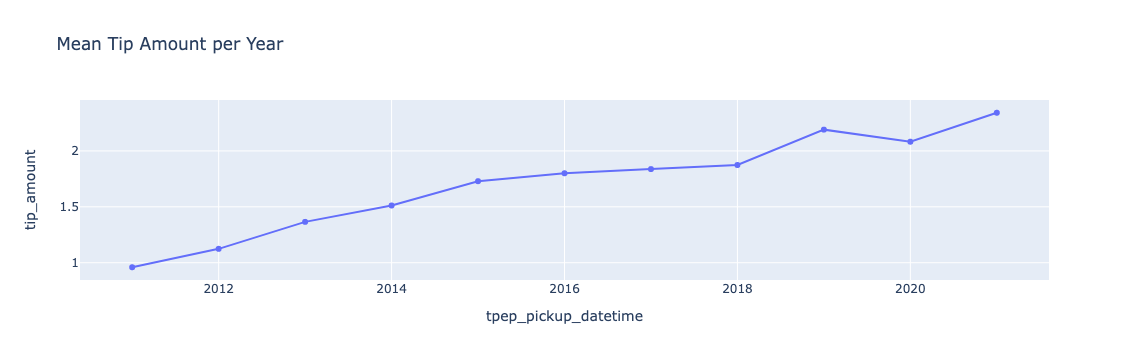

In [28]:
import plotly.express as px

fig = px.line(
    df, 
    x="tpep_pickup_datetime", 
    y="tip_amount", 
    title="Mean Tip Amount per Year",
    markers=True,
    
)

fig.show()

In [ ]:
go.scatter.Line(
    x = [x['date'] for x in signups],
    y a= [x['signups'] for x in signups],
    fill = 'tozeroy',
    line=dict(color='#2196f3')
)